## RECOLECCIÓN Y PREPARACIÓN DE DATOS

In [1]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Carga de datos
url = "https://raw.githubusercontent.com/gagabriela2787/Grupo7ISPC/gabriela/nacidos-vivos-registrados-2018_deis.csv"
df = pd.read_csv(url, index_col=0)

## ANÁLISIS EXPLORATORIO

In [9]:
#Muestra aleatória de n filas del dataset:
df.sample(5)

,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
jurisdiccion_de_residencia_id,,,,,,,,,,,,,,
82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,3,24 a 27,4,Secundaria/Polimodal Incomplet,3,1000 a 1499,1
22,Chaco,1,Simple,1,Varón,1,Menor de 15,6,37 a 41,4,Secundaria/Polimodal Incomplet,5,2000 a 2499,1
10,Catamarca,1,Simple,1,Varón,5,30 a 34,6,37 a 41,1,Sin instrucción,7,3000 a 3499,1
66,Salta,1,Simple,1,Varón,4,25 a 29,5,32 a 36,6,Terciaria/Universitaria Incomp,5,2000 a 2499,5
6,Buenos Aires,1,Simple,2,Mujer,6,35 a 39,4,28 a 31,6,Terciaria/Universitaria Incomp,3,1000 a 1499,5


### Consulta: Nacimientos discriminados por edad de la madre

In [10]:
# Agrupamos y sumamos los nacimientos según edad de la madre:
rangoedadmama = df.groupby('edad_de_la_madre_grupos_id')['cantidad_nacimientos'].sum()
print(rangoedadmama)

edad_de_la_madre_grupos_id
1      2350
2     84768
3    164480
4    163156
5    140679
6     91509
7     24866
8      1927
9     11659
Name: cantidad_nacimientos, dtype: int64


Para hacer el gráfico vamos a necesitar reemplazar los números de cada grupo etario por el nombre correspondiente. Es importante que los gráficos tengan etiquetas claras y fácilmente interpretables. Para eso uso podemos aprovechar la función que ya creé en mis consultas llamada **'id_a_nombre_ordenado()'** que nos devuelve una lista con los nombres de los grupos de forma ordenada. Copio el código acá, en el trabajo final sólo aparecerá una vez.

#### FUNCION 'id_a_nombre_ordenado()'

In [19]:
def id_a_nombre_ordenado(columna_id, columna_nombre):
    #Extraigo las variables en orden de aparición:
    var_id = df[columna_id].unique()
    var_nombre = df[columna_nombre].unique()
    
    #Las enlazo en un diccionario:
    var_id_nombre = {}
    for i in range(len(var_id)):
        var_id_nombre[var_id[i]] = var_nombre[i]
        
    #Las reorganizo según id y extraigo los valores:
    lista_organizada = []
    for i in range(len(var_id_nombre)):
        lista_organizada.append(var_id_nombre[i+1])
    
    return lista_organizada

In [20]:
#Le pedimos que nos de la lista ordenada con los nombres de los grupos etarios (Notar que esta lista también la uso en mi
#consulta, por lo que habrá que generarla una única vez)

grupos_etarios = id_a_nombre_ordenado('edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre')
print(grupos_etarios)

['Menor de 15', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', 'De 45 y más', 'Sin especificar']


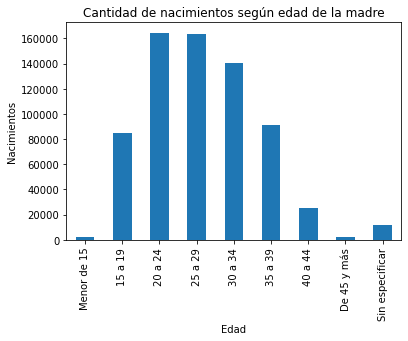

In [26]:
#Gráfico: Convienen barras verticales, para apreciar mejor la acumulación de cantidad. Para eso usamos '.bar()'

#rangoedadmama.plot.barh()
rangoedadmama.plot.bar()

#Cambiamos los números en las barras por las etiquetas de grupos etarios:
plt.xticks(range(len(grupos_etarios)), grupos_etarios, rotation='vertical')

#Datos infaltables para todo gráfico: Título y etiquetas de ejes
plt.title("Cantidad de nacimientos según edad de la madre")
plt.xlabel("Edad")
plt.ylabel("Nacimientos")
plt.show()